In [58]:
# Assignment 14

# Random Forest (Multi-class classification)

In [59]:
import pandas as pd

df = pd.read_excel('glass.xlsx',sheet_name='glass')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
print(df.info())

print("shape :",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
shape : (214, 10)


In [61]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [62]:
duplicate_indices = df.index[df.duplicated()]
print(duplicate_indices)

df.drop(index=39,inplace=True)

df.duplicated().sum()

Index([39], dtype='int64')


np.int64(0)

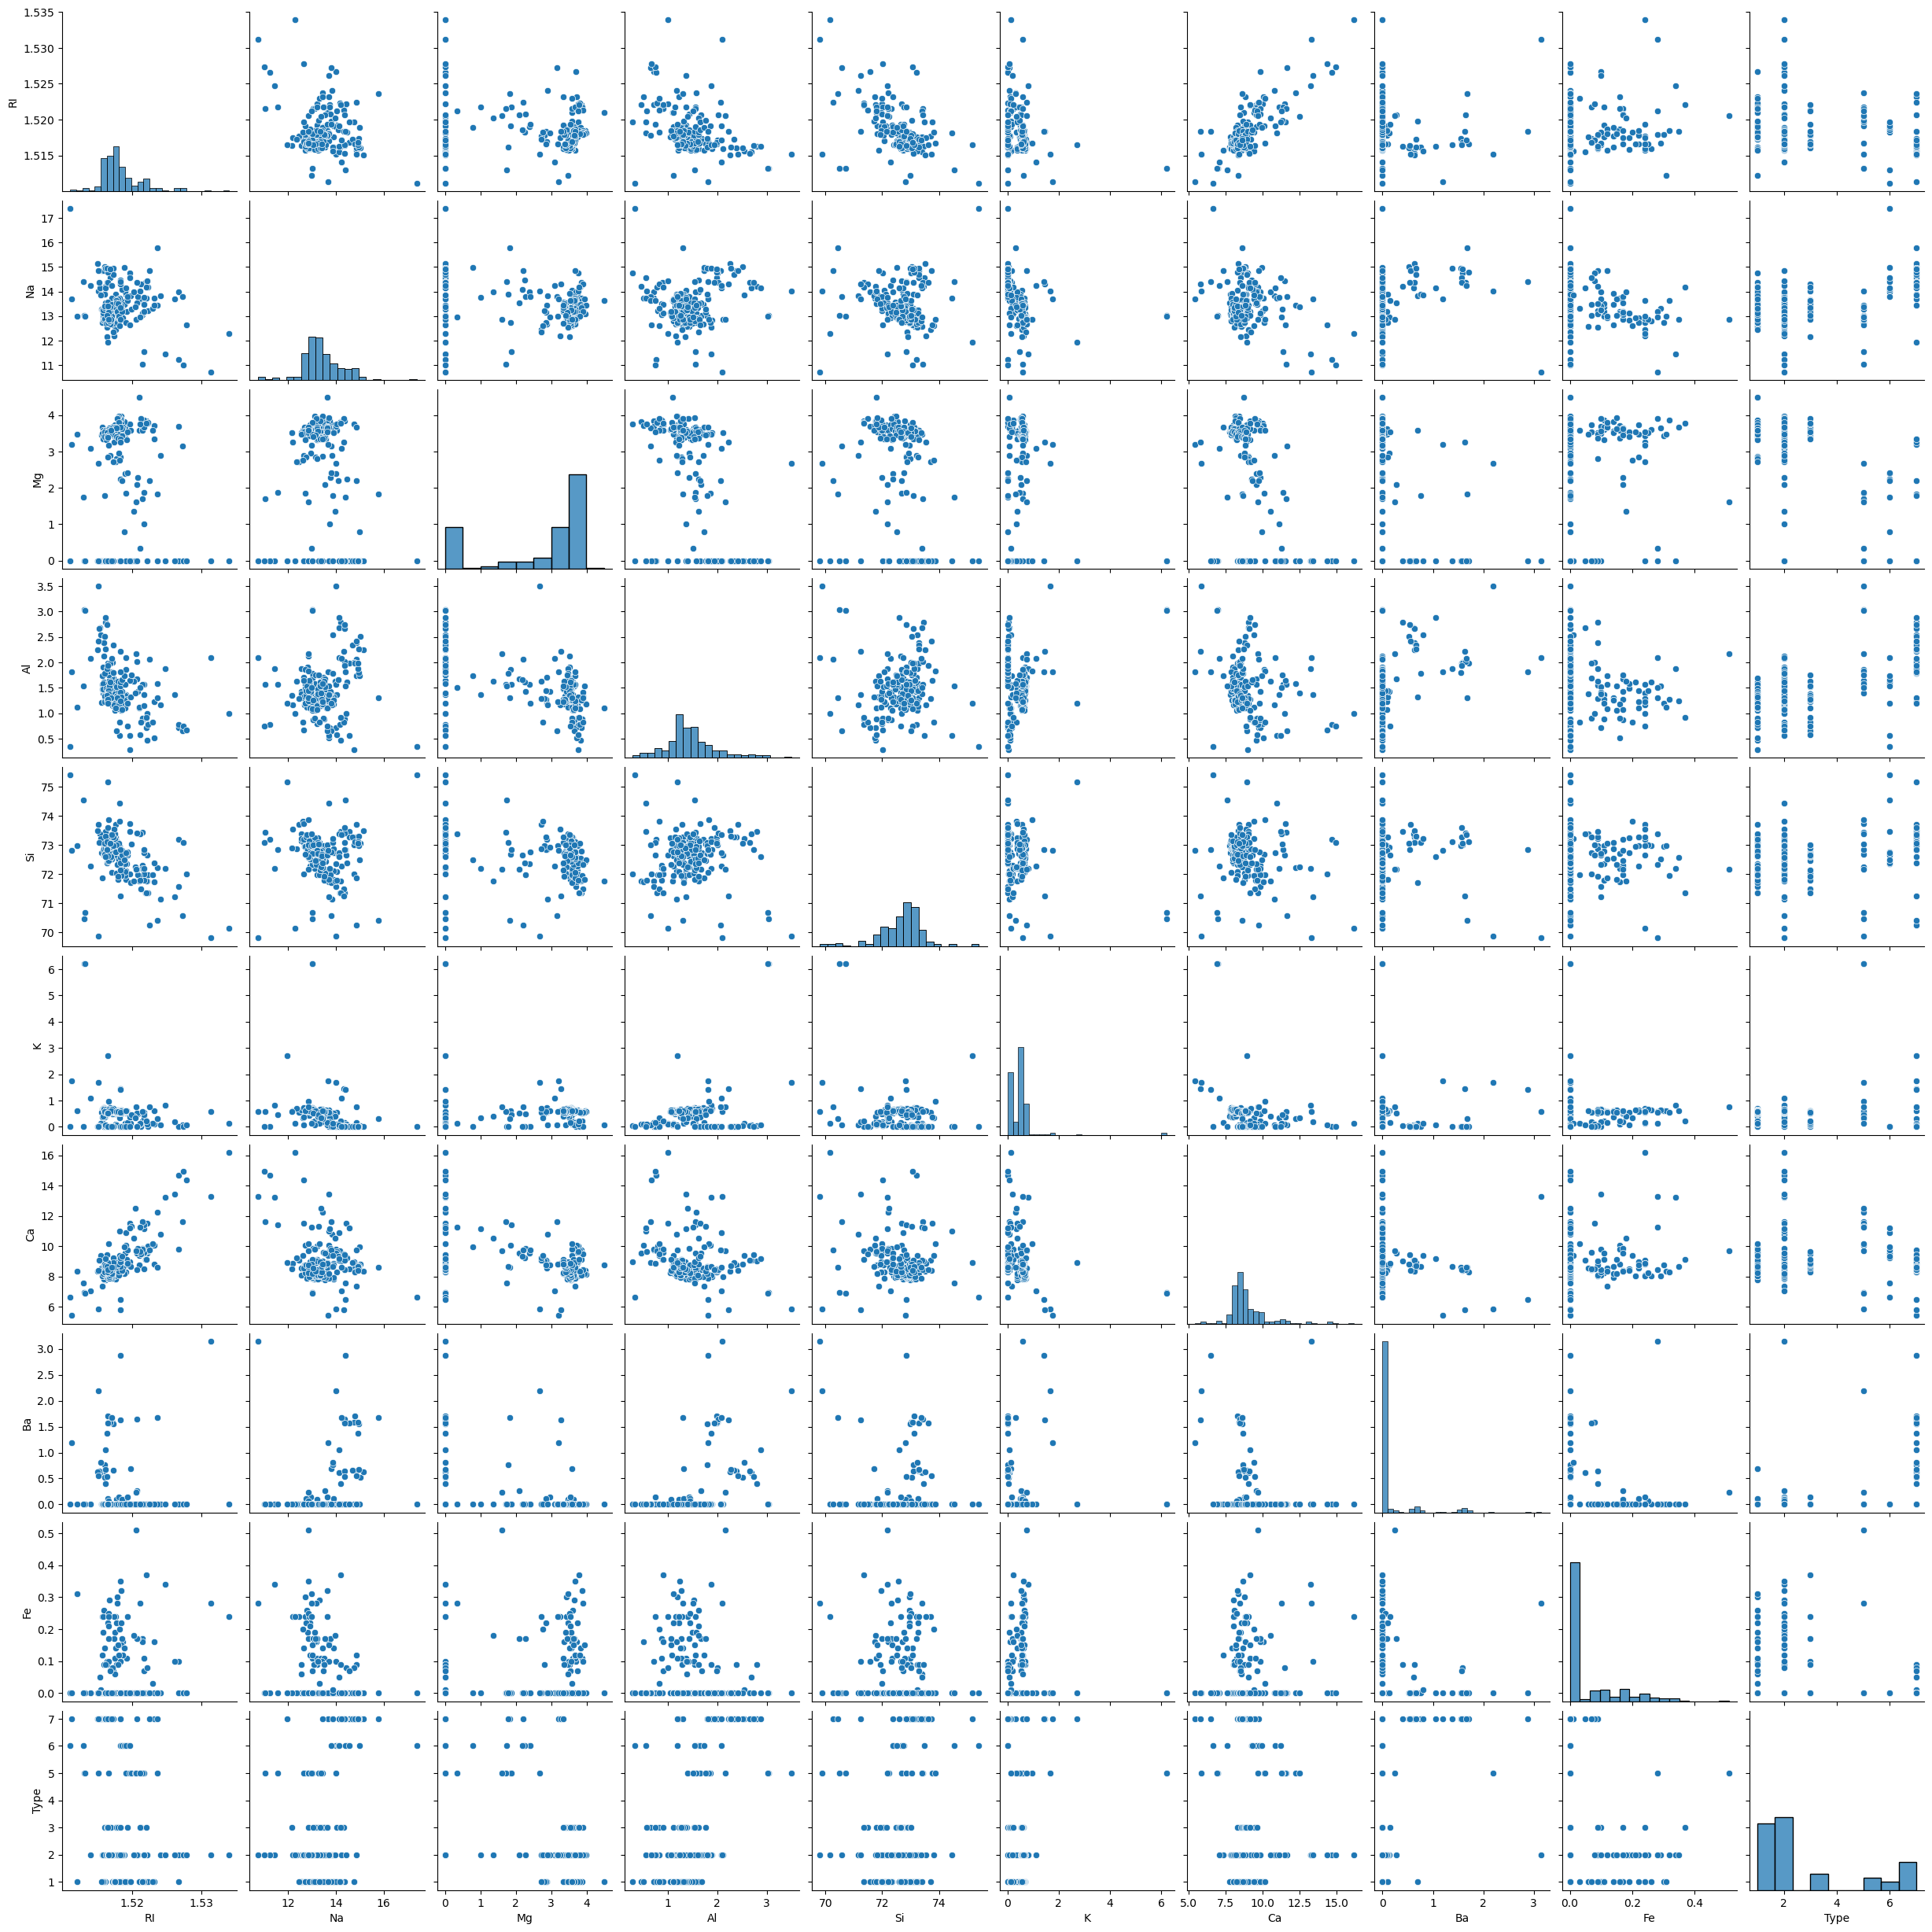

In [63]:
# pair plot

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

<Axes: >

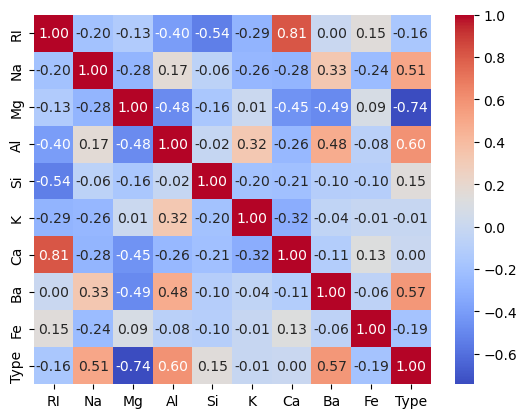

In [64]:
# checking correlation

corr = df.corr()

sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')

observation :

- Even though Ca (calsium) & RI (Refractive Index) are highly correlated , no need to drop one of them as Random forest will take care of it.
- for linear/distance models drop ,for trees no need 

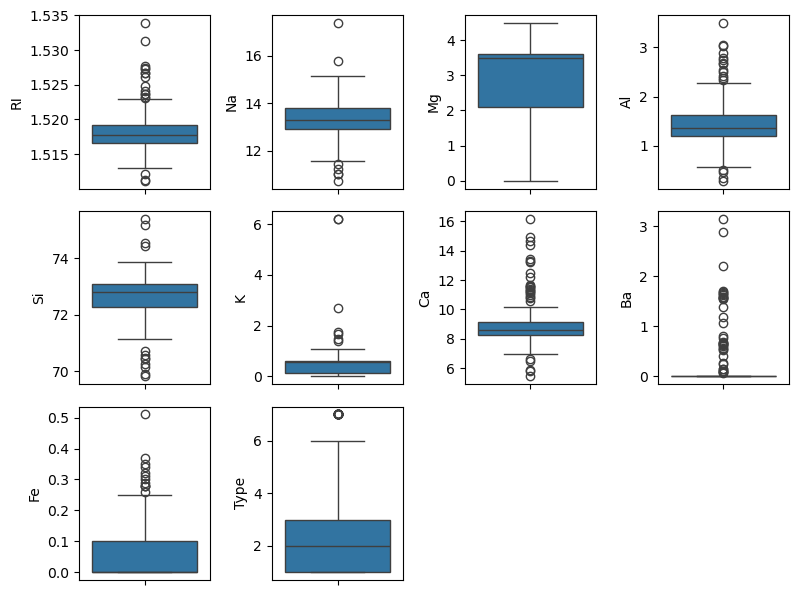

In [65]:
# box plot

plt.figure(figsize=(8,6))

for i,col in enumerate(df.columns,1):
    plt.subplot(3,4,i)
    sns.boxplot(df[col])

plt.tight_layout()

In [66]:
# checking for missing values 
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [67]:
# scaling & handling outliers

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


<Axes: xlabel='Type', ylabel='count'>

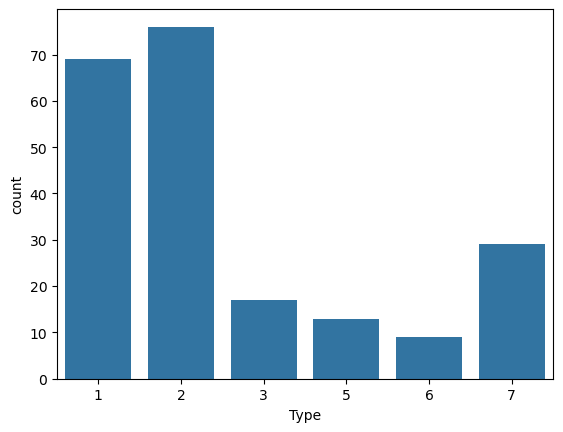

In [68]:
# checking for imbalace 

print(df['Type'].value_counts())

sns.countplot(x='Type',data=df)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

X = df.drop('Type',axis=1)
y = df['Type']

le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=38)

scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [70]:
# handling imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=38)

X_res, y_res = smote.fit_resample(X_train_t, y_train)

In [71]:
# Bagging

# model fitting

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_res,y_res)

y_pred = clf.predict(X_test_t)

In [72]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred,zero_division=0)

print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.86      0.78      0.82        23
           2       0.50      0.20      0.29         5
           3       0.62      1.00      0.77         5
           4       0.67      1.00      0.80         2
           5       1.00      0.78      0.88         9

    accuracy                           0.80        64
   macro avg       0.74      0.78      0.73        64
weighted avg       0.80      0.80      0.79        64



In [73]:
# Boosting

import xgboost

from xgboost import XGBClassifier

xg_clf = XGBClassifier()

xg_clf.fit(X_res,y_res)

y_pred_xgb = xg_clf.predict(X_test_t)

report_xgb = classification_report(y_test,y_pred_xgb,zero_division=0)

print(report_xgb)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.90      0.78      0.84        23
           2       0.67      0.40      0.50         5
           3       0.62      1.00      0.77         5
           4       1.00      1.00      1.00         2
           5       1.00      0.78      0.88         9

    accuracy                           0.83        64
   macro avg       0.83      0.82      0.81        64
weighted avg       0.84      0.83      0.82        64



In [74]:
# Bagging : BaggingClassifier

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier()

bag_clf.fit(X_res,y_res)

y_pred_bag = bag_clf.predict(X_test_t)

report_bag = classification_report(y_test,y_pred_bag,zero_division=0)

print(report_bag)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.65      0.65      0.65        23
           2       0.50      0.20      0.29         5
           3       0.57      0.80      0.67         5
           4       0.67      1.00      0.80         2
           5       1.00      0.78      0.88         9

    accuracy                           0.70        64
   macro avg       0.69      0.70      0.67        64
weighted avg       0.71      0.70      0.69        64



In [77]:
from sklearn.metrics import confusion_matrix

rf = confusion_matrix(y_test,y_pred)

bag = confusion_matrix(y_test,y_pred_bag)

xgb = confusion_matrix(y_test,y_pred_xgb)

print("----------Random Forest confusion matrix----------")
print(rf)
print("----------XGBoost confusion matrix----------")
print(xgb)
print("----------BaggingClassifier confusion matrix----------")
print(bag)

----------Random Forest confusion matrix----------
[[18  1  1  0  0  0]
 [ 1 18  0  3  1  0]
 [ 3  1  1  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0  7]]
----------XGBoost confusion matrix----------
[[19  1  0  0  0  0]
 [ 1 18  1  3  0  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0  7]]
----------BaggingClassifier confusion matrix----------
[[16  4  0  0  0  0]
 [ 3 15  1  3  1  0]
 [ 2  2  1  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0  7]]


#### Interview Questions
<pre>
1. a) Bagging (Bootstrap Aggregating) : RandomForest
      Uses bootstrapped datasets (random sampling with replacement) from the training data
      Trains multiple independent models (decision trees)
      Each model votes (classification) or averages (regression) to form the final prediction
      Reduces variance : helps prevent overfitting.
      Models are trained in parallel.
      Assigns equal weight to all models.

   b) Boosting : XGBoost
      Builds models sequentially, where each new model tries to correct the errors of the previous ones
      Focuses more on misclassified samples by giving them higher weights
      Combines models into a strong learner by weighted voting or weighted averaging
      Reduces bias and variance : leads to higher accuracy

2. - Class weights : weights = {0: 1, 1: 10,...}                      # class 1 is weighted 10x more
     model = RandomForestClassifier(class_weight=weights)
   - Resampling (SMOTE / undersampling) for small dataset             # Synthetic Minority Over-sampling Technique
   - Evaluate with Precision, Recall, F1, PR-AUC instead of accuracy

</pre>